In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/elsevier/Bert-NER'
# %cd $path
# import json
# import os
# import pandas as pd
# !pip install highlight-text
import matplotlib.pyplot as plt
# from highlight_text import HighlightText

In [ ]:
# show models
for item in os.listdir('saved_models/'):
   print(item)

2024-04-09_n_0_b_1_s_1_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-09_n_0_b_1_s_18_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-09_n_0_b_1_s_2_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_22_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_2222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_22222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_3_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001


In [ ]:
model_name = '2024-04-09_n_0_b_1_s_2_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001'
epoch_dump = 2
sample_dump = 0
sample_file_dump = f'saved_models/{model_name}/{model_name}_e_{epoch_dump}_test_{sample_dump}.json'
with open(sample_file_dump) as f_dump:
    for j_dump in f_dump:
        record_dump = json.loads(j_dump)
words_dump, pred_dump = record_dump['words'], record_dump['pred']

In [ ]:
CLASSES = ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION', 'VALUE', 'APPL']
info = {'MATERIAL': [], 'MLIP': [], 'PROPERTY': [], 'SIMULATION': [], 'VALUE': [], 'APPL': []}
for i, p in enumerate(pred_dump):
    if p != 0:
        info[CLASSES[p]].append(words_dump[i])
# print(info)
for k, v in info.items():
    print(k, v)

MATERIAL ['The', 'W', 'Mo', 'alloys', 'pure', 'W', 'W', 'Mo', 'pure', 'W', 'W', 'Mo', 'pure', 'W', 'interstitials']
MLIP ['Gaussian', 'approximation', 'potential', 'GAP', 'machine', '-', 'learning', 'interatomic', 'potential', 'GAP', 'tabulated', 'GAP', 'tabGAP', 'tabGAP', 'GAP']
PROPERTY ['radiation', 'radiation', 'damage', 'sizes']
SIMULATION ['classical', 'molecular', 'dynamics']
VALUE ['50', '50', 'similar', 'two', 'orders', 'of', 'magnitude']
APPL []


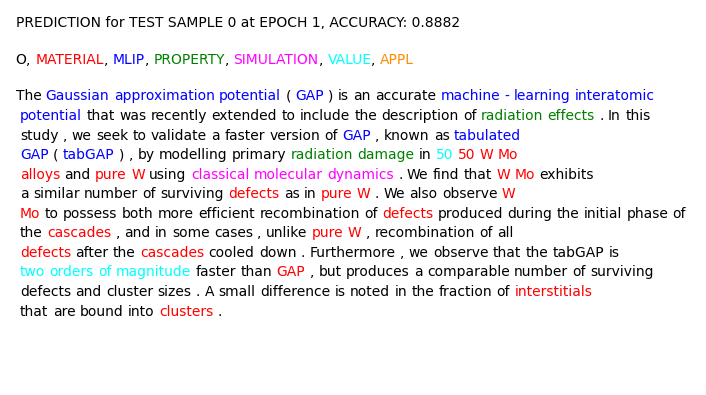

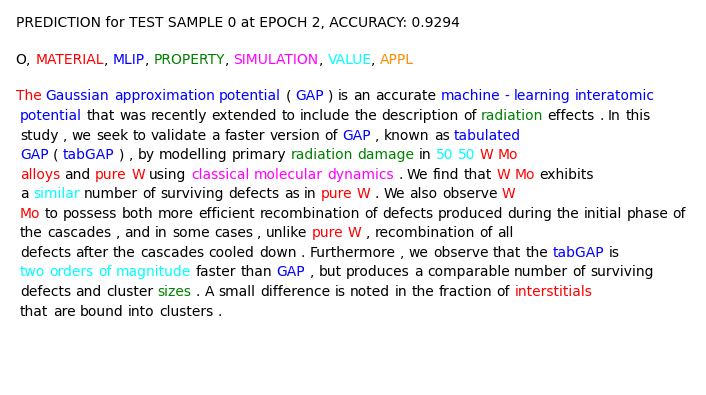

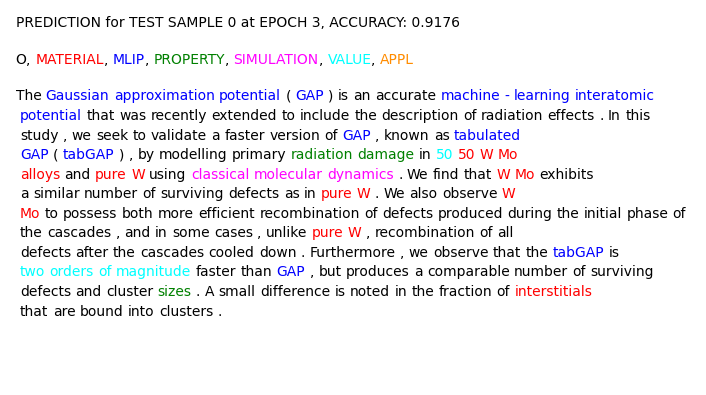

In [ ]:
# Load and visualize previous test data
model_name = '2024-04-09_n_0_b_1_s_2_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001'
plot_labels = False
epochs = [1, 2, 3]
sample_ids = [0]
for epoch in epochs:
    for sample_id in sample_ids:
        sample_file = f'saved_models/{model_name}/{model_name}_e_{epoch}_test_{sample_id}.json'
        with open(sample_file) as f:
            for jsonObj in f:
                record = json.loads(jsonObj)
        # calculate accuracy
        counts = 0
        for ii in range(len(record['pred'])):
            if record['pred'][ii] == record['labels'][ii]:
                counts += 1
        accuracy = counts / len(record['pred'])

        colors = ['black', 'red', 'blue', 'green', 'magenta', 'cyan', 'darkorange']
        word_list_marked = ['<' + w + '>' for w in record['words']]
        markers_labels = [{"color": colors[i]} for i in record['labels']]
        markers_pred = [{"color": colors[i]} for i in record['pred']]
        j = 0
        for i in range(len(record['words'])):
            if (i + 1) % 15 == 0:
                word_list_marked.insert(i + j, '\n')
                j += 1

        fig, ax = plt.subplots()
        ax.set_axis_off()
        HighlightText(x=0., y=1.0, s=f'PREDICTION for TEST SAMPLE {sample_id} at EPOCH {epoch}, ACCURACY: {accuracy:.4f}', ax=ax)
        HighlightText(x=0., y=0.9, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
                      highlight_textprops=[{"color": c} for c in colors], ax=ax)
        HighlightText(x=0., y=0.8, s=' '.join(word_list_marked),
                      highlight_textprops=markers_pred, ax=ax)
        plt.show()
if plot_labels:
    fig, ax = plt.subplots()
    ax.set_axis_off()
    HighlightText(x=0., y=1.0, s='Labels', ax=ax)
    HighlightText(x=0., y=0.9, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
                  highlight_textprops=[{"color": c} for c in colors], ax=ax)
    HighlightText(x=0., y=0.8, s=' '.join(word_list_marked),
                  highlight_textprops=markers_labels, ax=ax)
    plt.show()

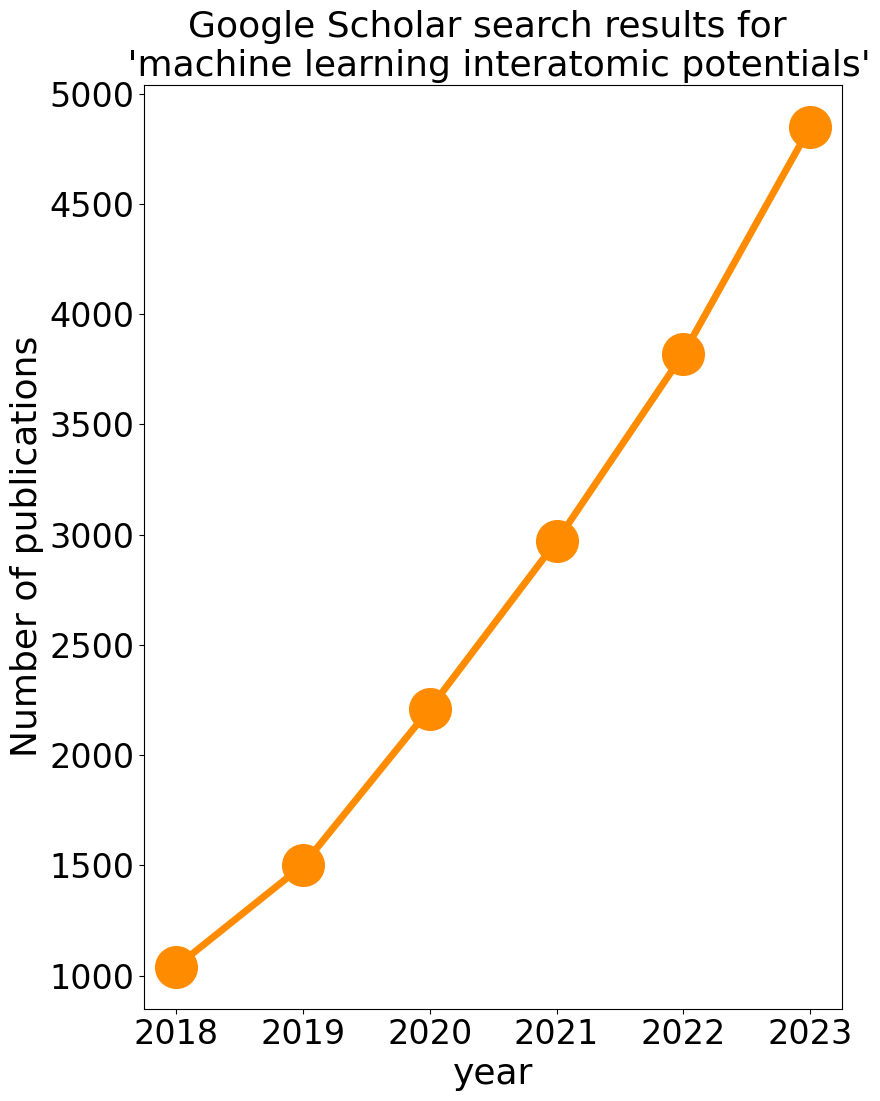

In [3]:
plt.figure(figsize=(9, 12))
years = [2018, 2019, 2020, 2021, 2022, 2023]
papers = [1040, 1500, 2210, 2970, 3820, 4850]
plt.plot(years, papers, 'o-', linewidth=5, markersize=30, color='darkorange')
plt.title("Google Scholar search results for \n 'machine learning interatomic potentials'", fontsize=26)
plt.xlabel("year", fontsize=26)
plt.ylabel("Number of publications", fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()